In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast, os, requests
import seaborn as sns
from bs4 import BeautifulSoup
from tqdm import tqdm
import scipy.stats as st
import warnings
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
warnings.filterwarnings('ignore')
api = ''
#This is just Yutaro's Folder path. change as necessary!
data_folder = ''

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

## Read in Files

In [ ]:
sider_tn = pd.read_csv(data_folder+'sider_tn_data.csv')
sider_tn.head(1)

,id_1,id_2,z_adjust_score,drug_1_targets,drug_2_targets,target_overlap,drug_1_indi,drug_2_indi,db_indi_overlap,drug_1_medi_indi,drug_2_medi_indi,medi_indi_overlap
0,CID100000119,CID100000085,-1.267839,0.0,11.0,0.0,NaN,3.0,NaN,5.0,1.0,0.0


In [ ]:
onsides_tn = pd.read_csv(data_folder+'onsides_tn_data.csv')
onsides_tn.head(1)

,id_1,id_2,z_adjust_score,drug_1_targets,drug_2_targets,target_overlap,drug_1_indi,drug_2_indi,db_indi_overlap,drug_1_medi_indi,drug_2_medi_indi,medi_indi_overlap
0,1005921,1000082,0.570195,3.0,1.0,0.0,3.0,1.0,0.0,2.0,2.0,0.0


---
## Make Fig 4A/5A

### Targets

In [ ]:
#binning
onsides_t = onsides_tn[(onsides_tn.drug_1_targets > 0)|(onsides_tn.drug_2_targets > 0)]
onsides_t['pct_overlap'] = onsides_t.apply(lambda x: x.target_overlap / (x.drug_1_targets + x.drug_2_targets - x.target_overlap), axis = 1)
onsides_t = onsides_t[onsides_t.pct_overlap.notna()][['pct_overlap', 'z_adjust_score']]
onsides_t['bin_score'] = pd.qcut(onsides_t['z_adjust_score'], q=50, labels=False, precision=0)
onsides_t = onsides_t.groupby('bin_score').agg(list).reset_index()
onsides_t['z_score'] = onsides_t.z_adjust_score.apply(lambda x: np.mean(x))
onsides_t['pct_overlap_mean'] = onsides_t.pct_overlap.apply(lambda x: np.mean(x))
onsides_t['pct_ci'] = onsides_t.pct_overlap.apply(lambda x: st.t.interval(alpha=0.95, df=len(x)-1, loc=np.mean(x), scale=st.sem(x)))
onsides_t['pct_ci_1'] = onsides_t.apply(lambda x: x.pct_overlap_mean - x.pct_ci[0], axis = 1)
onsides_t['pct_ci_2'] = onsides_t.apply(lambda x: x.pct_ci[1] - x.pct_overlap_mean, axis = 1)
onsides_t.head(1)

,bin_score,pct_overlap,z_adjust_score,z_score,pct_overlap_mean,pct_ci,pct_ci_1,pct_ci_2
0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.511580667706094, -1.5260533669828136, -1.5...",-1.470581,0.001177,"(0.0008202637463489634, 0.001533187405266844)",0.000356,0.000356


In [ ]:
#binning
sider_t = sider_tn[(sider_tn.drug_1_targets > 0)|(sider_tn.drug_2_targets > 0)]
sider_t['pct_overlap'] = sider_t.apply(lambda x: x.target_overlap / (x.drug_1_targets + x.drug_2_targets - x.target_overlap), axis = 1)
sider_t = sider_t[sider_t.pct_overlap.notna()][['pct_overlap', 'z_adjust_score']]
sider_t['bin_score'] = pd.qcut(sider_t['z_adjust_score'], q=50, labels=False, precision=0)
sider_t = sider_t.groupby('bin_score').agg(list).reset_index()
sider_t['z_score'] = sider_t.z_adjust_score.apply(lambda x: np.mean(x))
sider_t['pct_overlap_mean'] = sider_t.pct_overlap.apply(lambda x: np.mean(x))
sider_t['pct_ci'] = sider_t.pct_overlap.apply(lambda x: st.t.interval(alpha=0.95, df=len(x)-1, loc=np.mean(x), scale=st.sem(x)))
sider_t['pct_ci_1'] = sider_t.apply(lambda x: x.pct_overlap_mean - x.pct_ci[0], axis = 1)
sider_t['pct_ci_2'] = sider_t.apply(lambda x: x.pct_ci[1] - x.pct_overlap_mean, axis = 1)
sider_t.head(1)

,bin_score,pct_overlap,z_adjust_score,z_score,pct_overlap_mean,pct_ci,pct_ci_1,pct_ci_2
0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.340560882996196, -1.5167667995075451, -1.3...",-1.47827,0.003458,"(0.0028625027159993035, 0.004053475829888199)",0.000595,0.000595


In [ ]:
onsides_t.pct_overlap_mean.max(), sider_t.pct_overlap_mean.max()

(0.044657536610956304, 0.057013752767868714)

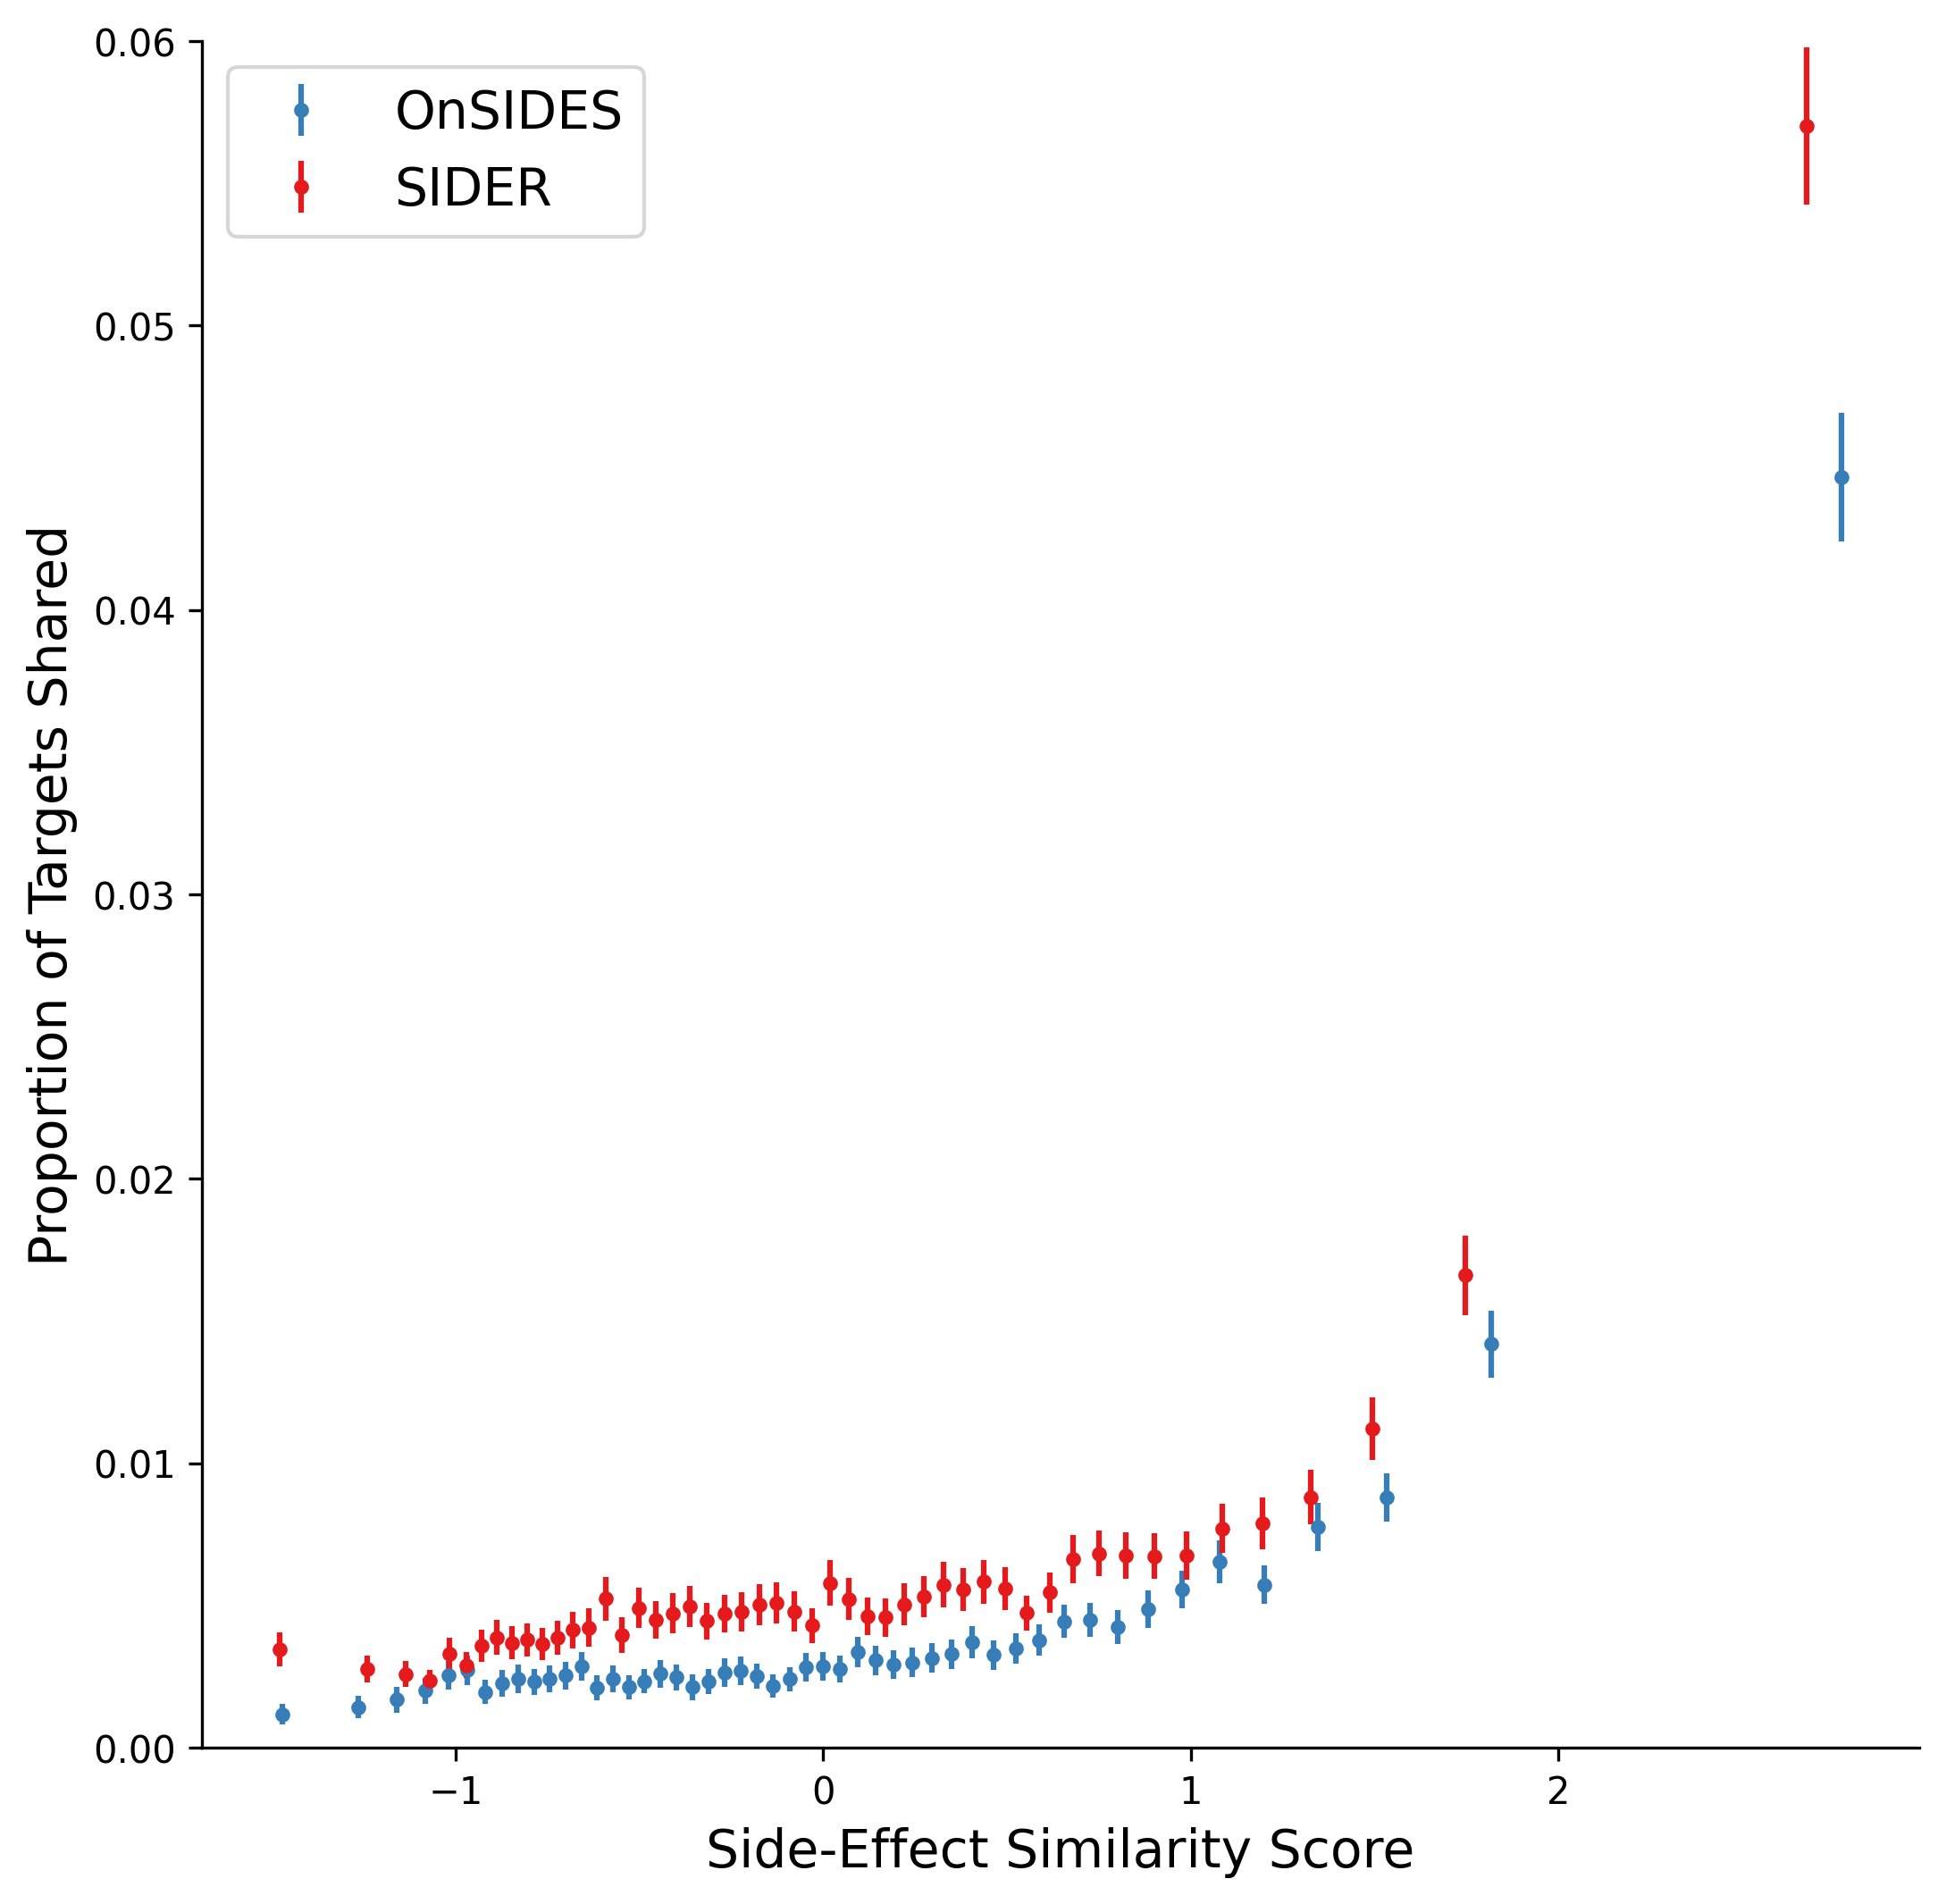

In [ ]:
#sns.set(rc={'figure.figsize':(11.27,8.27)})
plt.figure(figsize=(8.27, 8.27), dpi=300)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.errorbar(onsides_t.z_score, onsides_t.pct_overlap_mean, yerr= [onsides_t.pct_ci_1, onsides_t.pct_ci_2],
             marker = '.', linestyle = '', label = 'OnSIDES', c='#377eb8')
plt.errorbar(sider_t.z_score, sider_t.pct_overlap_mean, yerr= [sider_t.pct_ci_1, sider_t.pct_ci_2],
             marker = '.', linestyle = '', label = 'SIDER', c='#e41a1c')
plt.xlabel('Side-Effect Similarity Score', fontsize=14)
plt.ylabel('Proportion of Targets Shared', fontsize=14)
plt.ylim([0, 0.06])
plt.legend(fontsize=14)
plt.show()

### Indications (DrugBank)

In [ ]:
onsides_di = onsides_tn[(onsides_tn.drug_1_indi > 0)|(onsides_tn.drug_2_indi > 0)]
onsides_di = onsides_di[onsides_di.db_indi_overlap.notna()]
onsides_di['pct_overlap'] = onsides_di.apply(lambda x: x.db_indi_overlap / (x.drug_1_indi + x.drug_2_indi - x.db_indi_overlap), axis = 1)
onsides_di = onsides_di[['z_adjust_score', 'pct_overlap']]
onsides_di['bin_score'] = pd.qcut(onsides_di['z_adjust_score'], q=50, labels=False, precision=0)
onsides_di = onsides_di.groupby('bin_score').agg(list).reset_index()
onsides_di['pct_overlap_mean'] = onsides_di.pct_overlap.apply(lambda x: np.mean(x))
onsides_di['z_score'] = onsides_di.z_adjust_score.apply(lambda x: np.mean(x))
onsides_di['pct_overlap_mean'] = onsides_di.pct_overlap.apply(lambda x: np.mean(x))
onsides_di['pct_ci'] = onsides_di.pct_overlap.apply(lambda x: st.t.interval(alpha=0.95, df=len(x)-1, loc=np.mean(x), scale=st.sem(x)))
onsides_di['pct_ci_1'] = onsides_di.apply(lambda x: x.pct_overlap_mean - x.pct_ci[0], axis = 1)
onsides_di['pct_ci_2'] = onsides_di.apply(lambda x: x.pct_ci[1] - x.pct_overlap_mean, axis = 1)
onsides_di.head(1)

,bin_score,z_adjust_score,pct_overlap,pct_overlap_mean,z_score,pct_ci,pct_ci_1,pct_ci_2
0,0,"[-1.511580667706094, -1.5310437899644618, -1.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.00044,-1.471331,"(0.0002551736597371756, 0.0006238542639814083)",0.000184,0.000184


In [ ]:
sider_di = sider_tn[(sider_tn.drug_1_indi > 0)|(sider_tn.drug_2_indi > 0)]
sider_di = sider_di[sider_di.db_indi_overlap.notna()]
sider_di['pct_overlap'] = sider_di.apply(lambda x: x.db_indi_overlap / (x.drug_1_indi + x.drug_2_indi - x.db_indi_overlap), axis = 1)
sider_di = sider_di[['z_adjust_score', 'pct_overlap']]
sider_di['bin_score'] = pd.qcut(sider_di['z_adjust_score'], q=50, labels=False, precision=0)
sider_di = sider_di.groupby('bin_score').agg(list).reset_index()
sider_di['pct_overlap_mean'] = sider_di.pct_overlap.apply(lambda x: np.mean(x))
sider_di['z_score'] = sider_di.z_adjust_score.apply(lambda x: np.mean(x))
sider_di['pct_overlap_mean'] = sider_di.pct_overlap.apply(lambda x: np.mean(x))
sider_di['pct_ci'] = sider_di.pct_overlap.apply(lambda x: st.t.interval(alpha=0.95, df=len(x)-1, loc=np.mean(x), scale=st.sem(x)))
sider_di['pct_ci_1'] = sider_di.apply(lambda x: x.pct_overlap_mean - x.pct_ci[0], axis = 1)
sider_di['pct_ci_2'] = sider_di.apply(lambda x: x.pct_ci[1] - x.pct_overlap_mean, axis = 1)
sider_di.head(1)

,bin_score,z_adjust_score,pct_overlap,pct_overlap_mean,z_score,pct_ci,pct_ci_1,pct_ci_2
0,0,"[-1.340560882996196, -1.5167667995075451, -1.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0690789473684...",0.000978,-1.471075,"(0.0007670980065493002, 0.0011881320370365858)",0.000211,0.000211


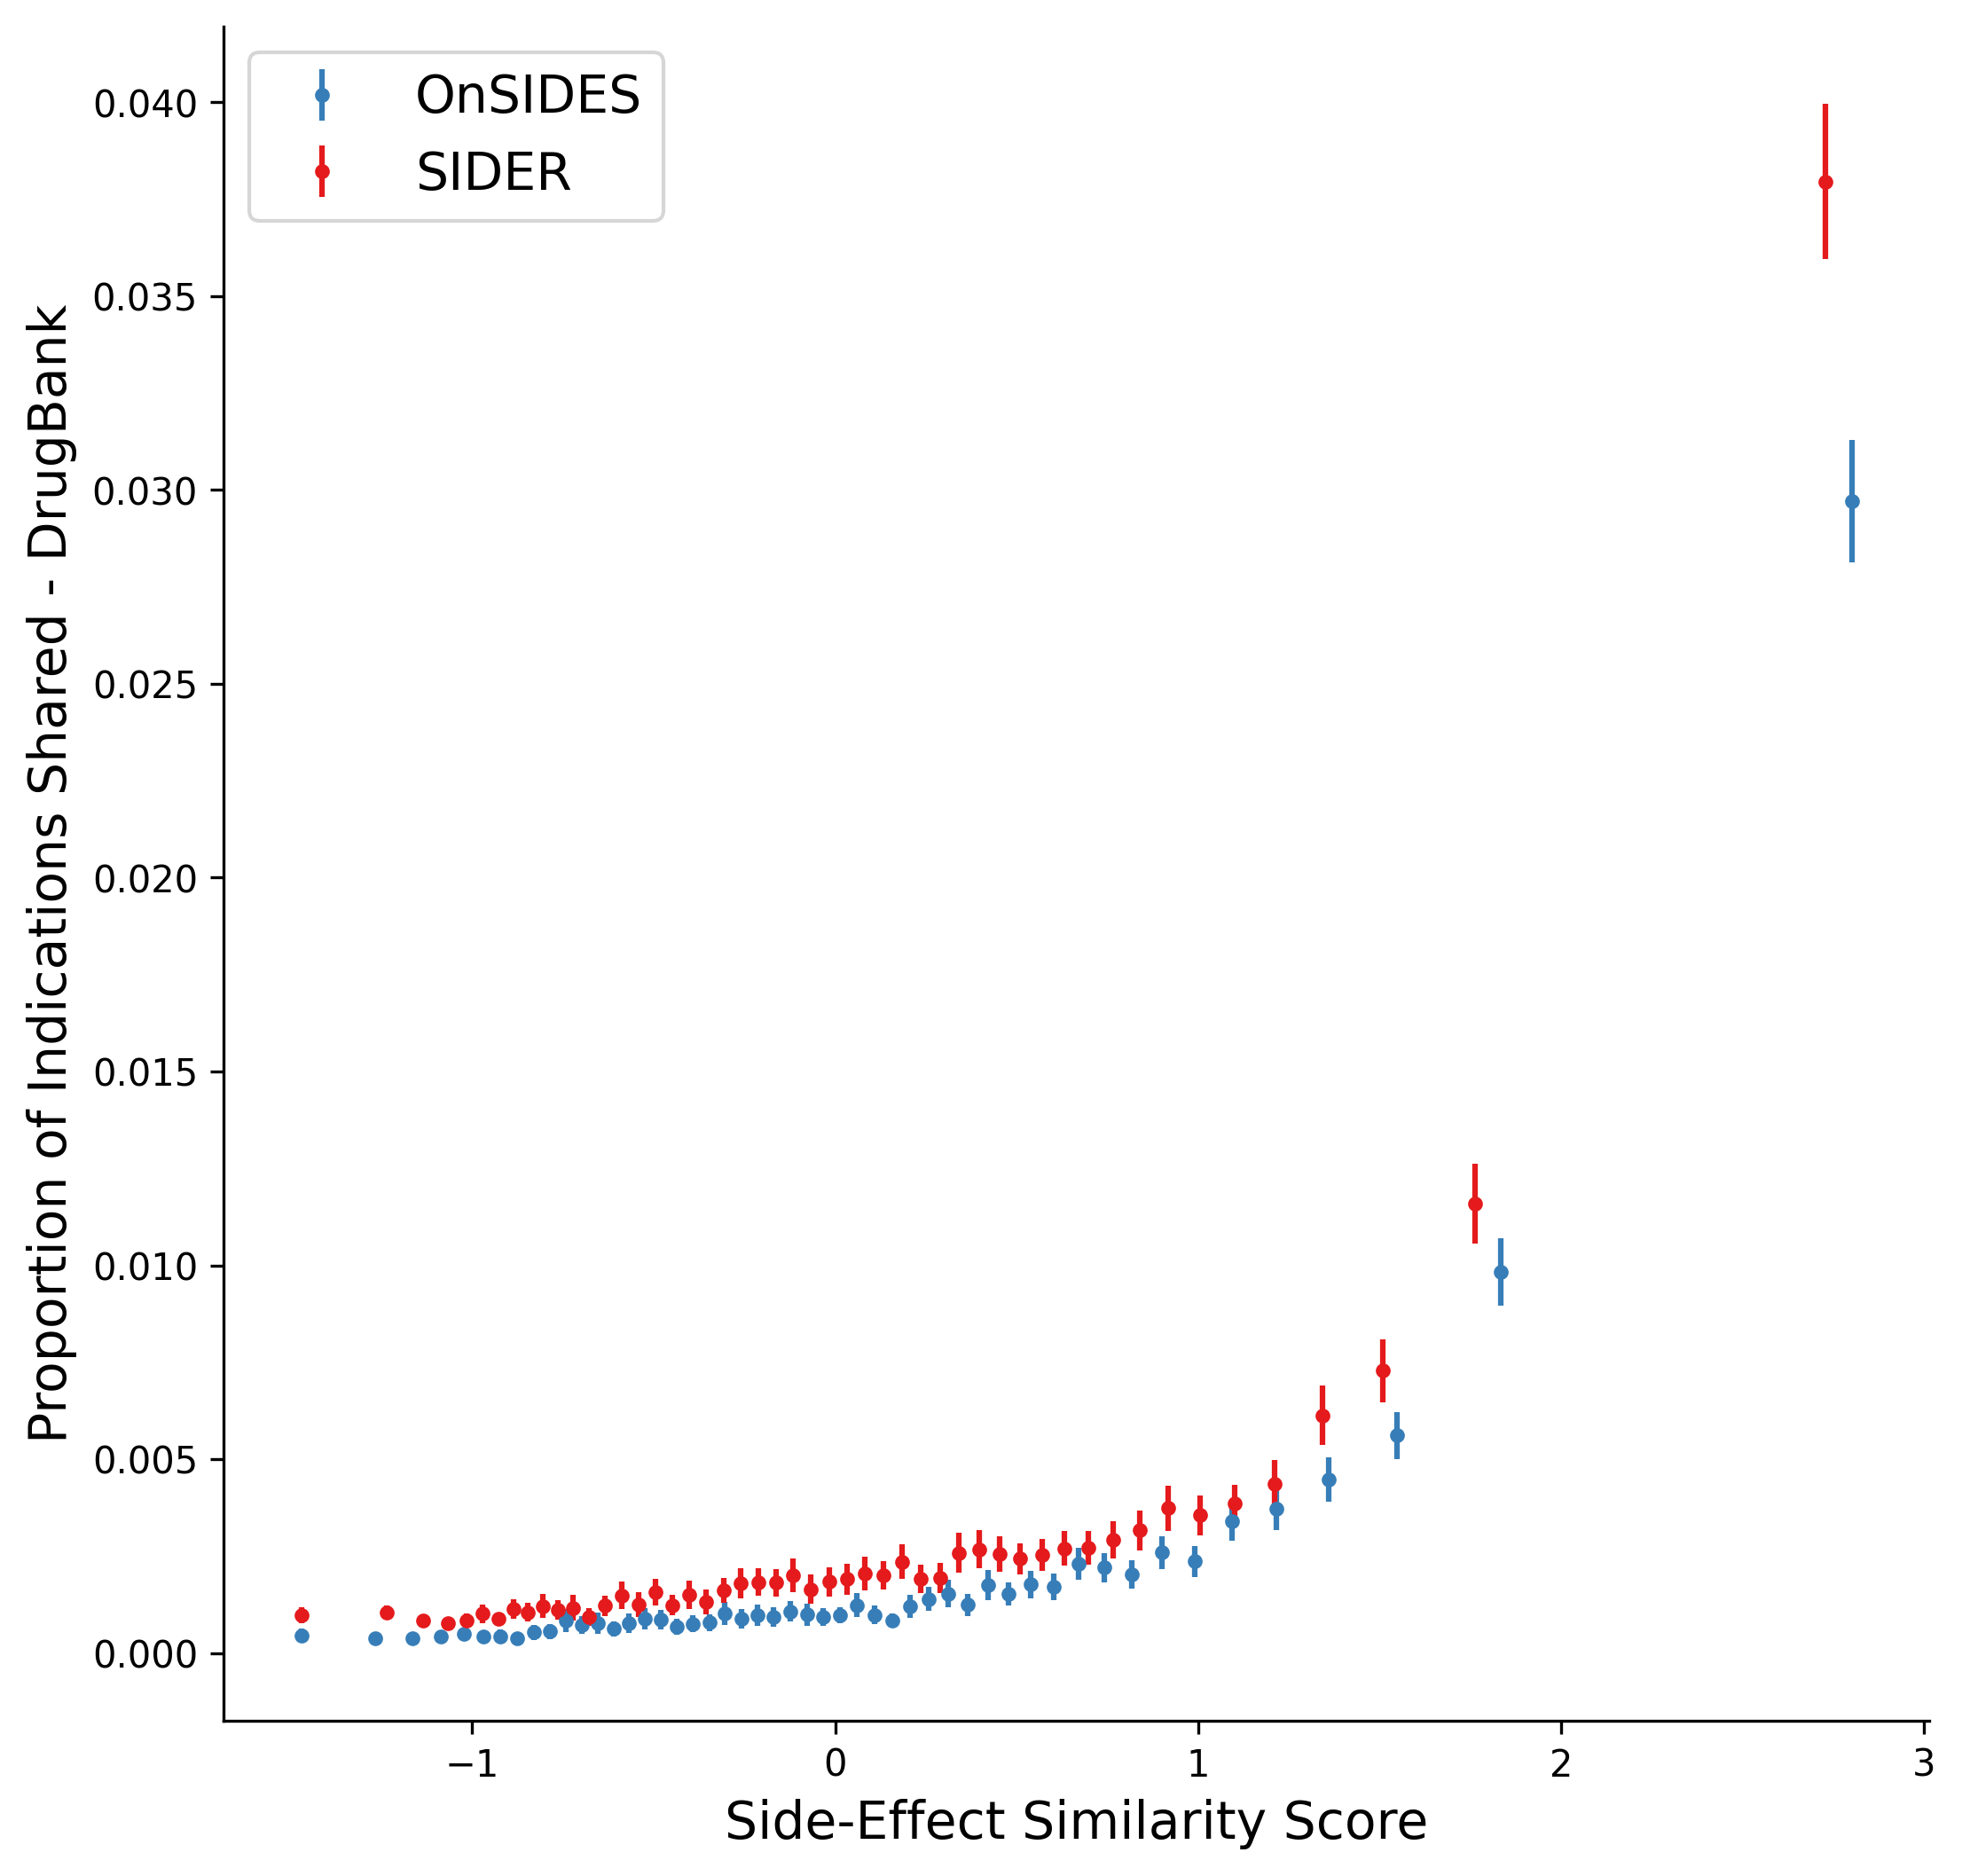

In [ ]:
#sns.set(rc={'figure.figsize':(11.27,8.27)})
plt.figure(figsize=(8.27, 8.27), dpi=300)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.errorbar(onsides_di.z_score, onsides_di.pct_overlap_mean, yerr= [onsides_di.pct_ci_1, onsides_di.pct_ci_2],
             marker = '.', linestyle = '', label = 'OnSIDES', c ='#377eb8')
plt.errorbar(sider_di.z_score, sider_di.pct_overlap_mean, yerr= [sider_di.pct_ci_1, sider_di.pct_ci_2],
             marker = '.', linestyle = '', label = 'SIDER', c='#e41a1c')
plt.xlabel('Side-Effect Similarity Score', fontsize=14)
plt.ylabel('Proportion of Indications Shared - DrugBank', fontsize=14)
plt.legend(fontsize=14)
plt.show()

### Indications (MEDI)

In [ ]:
onsides_i = onsides_tn[(onsides_tn.drug_1_medi_indi > 0)|(onsides_tn.drug_2_medi_indi > 0)]
onsides_i = onsides_i[onsides_i.medi_indi_overlap.notna()]
onsides_i['pct_overlap'] = onsides_i.apply(lambda x: x.medi_indi_overlap/(x.drug_1_medi_indi + x.drug_2_medi_indi + x.medi_indi_overlap), axis = 1)
onsides_i = onsides_i[['z_adjust_score', 'pct_overlap']]
onsides_i['bin_score'] = pd.qcut(onsides_i['z_adjust_score'], q=50, labels=False, precision=0)
onsides_i = onsides_i.groupby('bin_score').agg(list).reset_index()
onsides_i['pct_overlap_mean'] = onsides_i.pct_overlap.apply(lambda x: np.mean(x))
onsides_i['z_score'] = onsides_i.z_adjust_score.apply(lambda x: np.mean(x))
onsides_i['pct_overlap_mean'] = onsides_i.pct_overlap.apply(lambda x: np.mean(x))
onsides_i['pct_ci'] = onsides_i.pct_overlap.apply(lambda x: st.t.interval(alpha=0.95, df=len(x)-1, loc=np.mean(x), scale=st.sem(x)))
onsides_i['pct_ci_1'] = onsides_i.apply(lambda x: x.pct_overlap_mean - x.pct_ci[0], axis = 1)
onsides_i['pct_ci_2'] = onsides_i.apply(lambda x: x.pct_ci[1] - x.pct_overlap_mean, axis = 1)
onsides_i.head(1)

,bin_score,z_adjust_score,pct_overlap,pct_overlap_mean,z_score,pct_ci,pct_ci_1,pct_ci_2
0,0,"[-1.511580667706094, -1.542169743275212, -1.30...","[0.0, 0.07407407407407407, 0.0, 0.0, 0.0, 0.0,...",0.003704,-1.434707,"(0.003367605253815143, 0.004039840082383788)",0.000336,0.000336


In [ ]:
sider_i = sider_tn[(sider_tn.drug_1_medi_indi > 0)|(sider_tn.drug_2_medi_indi > 0)]
sider_i = sider_i[sider_i.medi_indi_overlap.notna()]
sider_i['pct_overlap'] = sider_i.apply(lambda x: x.medi_indi_overlap/(x.drug_1_medi_indi + x.drug_2_medi_indi + x.medi_indi_overlap), axis = 1)
sider_i = sider_i[['z_adjust_score', 'pct_overlap']]
sider_i['bin_score'] = pd.qcut(sider_i['z_adjust_score'], q=50, labels=False, precision=0)
sider_i = sider_i.groupby('bin_score').agg(list).reset_index()
sider_i['pct_overlap_mean'] = sider_i.pct_overlap.apply(lambda x: np.mean(x))
sider_i['z_score'] = sider_i.z_adjust_score.apply(lambda x: np.mean(x))
sider_i['pct_overlap_mean'] = sider_i.pct_overlap.apply(lambda x: np.mean(x))
sider_i['pct_ci'] = sider_i.pct_overlap.apply(lambda x: st.t.interval(alpha=0.95, df=len(x)-1, loc=np.mean(x), scale=st.sem(x)))
sider_i['pct_ci_1'] = sider_i.apply(lambda x: x.pct_overlap_mean - x.pct_ci[0], axis = 1)
sider_i['pct_ci_2'] = sider_i.apply(lambda x: x.pct_ci[1] - x.pct_overlap_mean, axis = 1)
sider_i.head(1)

,bin_score,z_adjust_score,pct_overlap,pct_overlap_mean,z_score,pct_ci,pct_ci_1,pct_ci_2
0,0,"[-1.5167667995075451, -1.319161741595206, -1.2...","[0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.023809523809...",0.003803,-1.442951,"(0.003429050754066191, 0.004177831537871206)",0.000374,0.000374


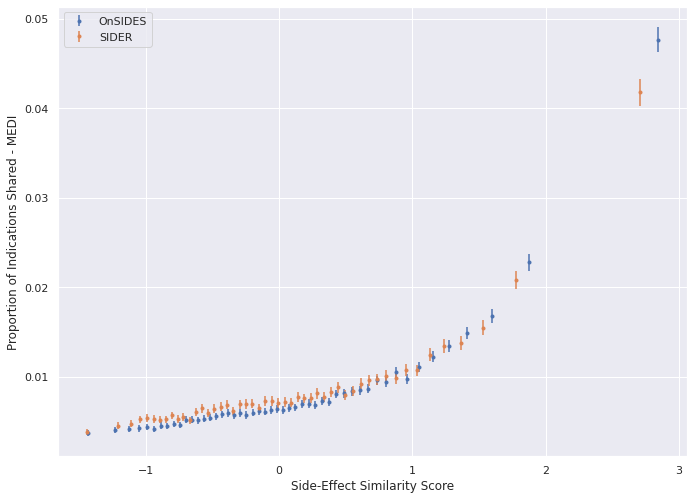

In [ ]:
sns.set(rc={'figure.figsize':(11.27,8.27)})
plt.errorbar(onsides_i.z_score, onsides_i.pct_overlap_mean, yerr= [onsides_i.pct_ci_1, onsides_i.pct_ci_2], marker = '.', linestyle = '', label = 'OnSIDES')
plt.errorbar(sider_i.z_score, sider_i.pct_overlap_mean, yerr= [sider_i.pct_ci_1, sider_i.pct_ci_2], marker = '.', linestyle = '', label = 'SIDER')
plt.xlabel('Side-Effect Similarity Score')
plt.ylabel('Proportion of Indications Shared - MEDI')
plt.legend()
plt.show()

## Make Fig 4B/5B

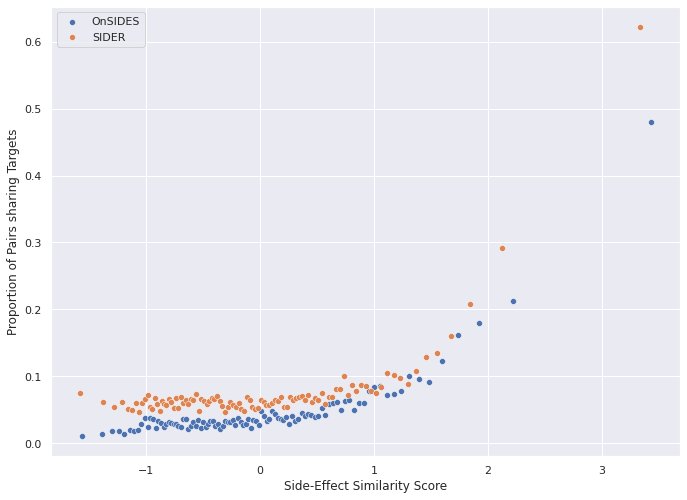

In [ ]:
sns.set(rc={'figure.figsize':(11.27,8.27)})
##Take out only the required columns.
onsides_target = onsides_tn[onsides_tn.target_overlap.notna()][['target_overlap', 'z_adjust_score']]
sider_target = sider_tn[sider_tn.target_overlap.notna()][['target_overlap', 'z_adjust_score']]
####################
##Bin OnSIDES target scores by adjusted Tanimoto coefficient
onsides_target['bin_score'] = pd.qcut(onsides_target['z_adjust_score'], q=100, labels=False, precision=0)
onsides_target = onsides_target.groupby('bin_score').agg(list).reset_index()
onsides_target['prop'] = onsides_target.target_overlap.apply(lambda x: np.mean(x))
onsides_target['z_score'] = onsides_target.z_adjust_score.apply(lambda x: np.mean(x))
#####################
##Bin SIDER target scores by adjusted Tanimoto coefficient
sider_target['bin_score'] = pd.qcut(sider_target['z_adjust_score'], q=100, labels=False, precision=0)
sider_target = sider_target.groupby('bin_score').agg(list).reset_index()
sider_target['prop'] = sider_target.target_overlap.apply(lambda x: np.mean(x))
sider_target['z_score'] = sider_target.z_adjust_score.apply(lambda x: np.mean(x))
####################
sns.scatterplot(data = onsides_target, x = 'z_score', y = 'prop', label = 'OnSIDES')
sns.scatterplot(data = sider_target, x = 'z_score', y = 'prop', label = 'SIDER')
plt.xlabel('Side-Effect Similarity Score')
plt.ylabel('Proportion of Pairs sharing Targets')
plt.show()

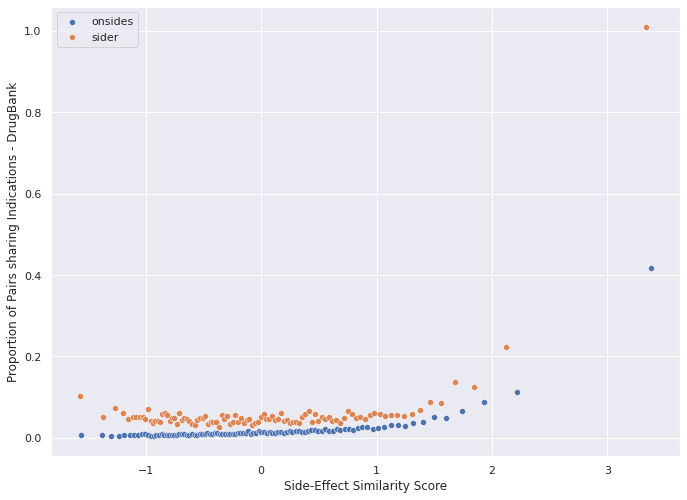

In [ ]:
sns.set(rc={'figure.figsize':(11.27,8.27)})
onsides_indications = onsides_tn[onsides_tn.db_indi_overlap.notna()][['db_indi_overlap', 'z_adjust_score']]
sider_indications = sider_tn[sider_tn.db_indi_overlap.notna()][['db_indi_overlap', 'z_adjust_score']]
####################
onsides_indications['bin_score'] = pd.qcut(onsides_indications['z_adjust_score'], q=100, labels=False, precision=0)
onsides_indications = onsides_indications.groupby('bin_score').agg(list).reset_index()
onsides_indications['prop'] = onsides_indications.db_indi_overlap.apply(lambda x: np.mean(x))
onsides_indications['z_score'] = onsides_indications.z_adjust_score.apply(lambda x: np.mean(x))
#####################
sider_indications['bin_score'] = pd.qcut(sider_indications['z_adjust_score'], q=100, labels=False, precision=0)
sider_indications = sider_indications.groupby('bin_score').agg(list).reset_index()
sider_indications['prop'] = sider_indications.db_indi_overlap.apply(lambda x: np.mean(x))
sider_indications['z_score'] = sider_indications.z_adjust_score.apply(lambda x: np.mean(x))
####################
sns.scatterplot(data = onsides_indications, x = 'z_score', y = 'prop', label = 'onsides')
sns.scatterplot(data = sider_indications, x = 'z_score', y = 'prop', label = 'sider')
plt.xlabel('Side-Effect Similarity Score')
plt.ylabel('Proportion of Pairs sharing Indications - DrugBank')
plt.show()

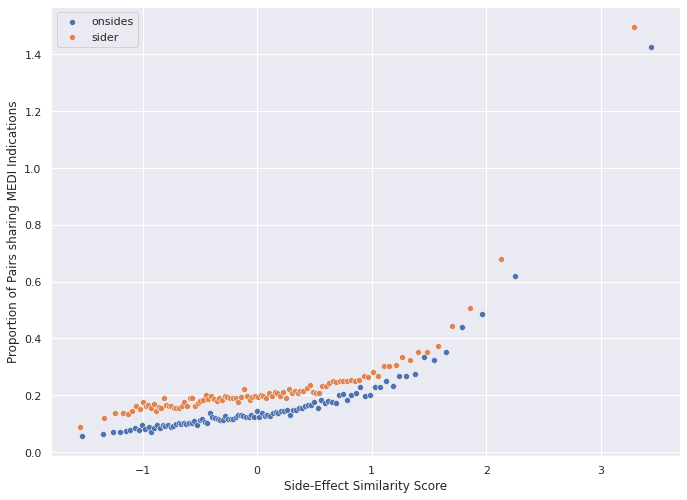

In [ ]:
#####################
sns.set(rc={'figure.figsize':(11.27,8.27)})
onsides_medi_hps_indications = onsides_tn[onsides_tn.medi_indi_overlap.notna()][['medi_indi_overlap', 'z_adjust_score']]
sider_medi_hps_indications = sider_tn[sider_tn.medi_indi_overlap.notna()][['medi_indi_overlap', 'z_adjust_score']]
####################
onsides_medi_hps_indications['bin_score'] = pd.qcut(onsides_medi_hps_indications['z_adjust_score'], q=100, labels=False, precision=0)
onsides_medi_hps_indications = onsides_medi_hps_indications.groupby('bin_score').agg(list).reset_index()
onsides_medi_hps_indications['prop'] = onsides_medi_hps_indications.medi_indi_overlap.apply(lambda x: np.mean(x))
onsides_medi_hps_indications['z_score'] = onsides_medi_hps_indications.z_adjust_score.apply(lambda x: np.mean(x))
#####################
sider_medi_hps_indications['bin_score'] = pd.qcut(sider_medi_hps_indications['z_adjust_score'], q=100, labels=False, precision=0)
sider_medi_hps_indications = sider_medi_hps_indications.groupby('bin_score').agg(list).reset_index()
sider_medi_hps_indications['prop'] = sider_medi_hps_indications.medi_indi_overlap.apply(lambda x: np.mean(x))
sider_medi_hps_indications['z_score'] = sider_medi_hps_indications.z_adjust_score.apply(lambda x: np.mean(x))
####################
sns.scatterplot(data = onsides_medi_hps_indications, x = 'z_score', y = 'prop', label = 'onsides')
sns.scatterplot(data = sider_medi_hps_indications, x = 'z_score', y = 'prop', label = 'sider')
plt.xlabel('Side-Effect Similarity Score')
plt.ylabel('Proportion of Pairs sharing MEDI Indications')
plt.show()

----
## Make ROC curves (Fig 4C/5C)


onsides 0.667
sider 0.59


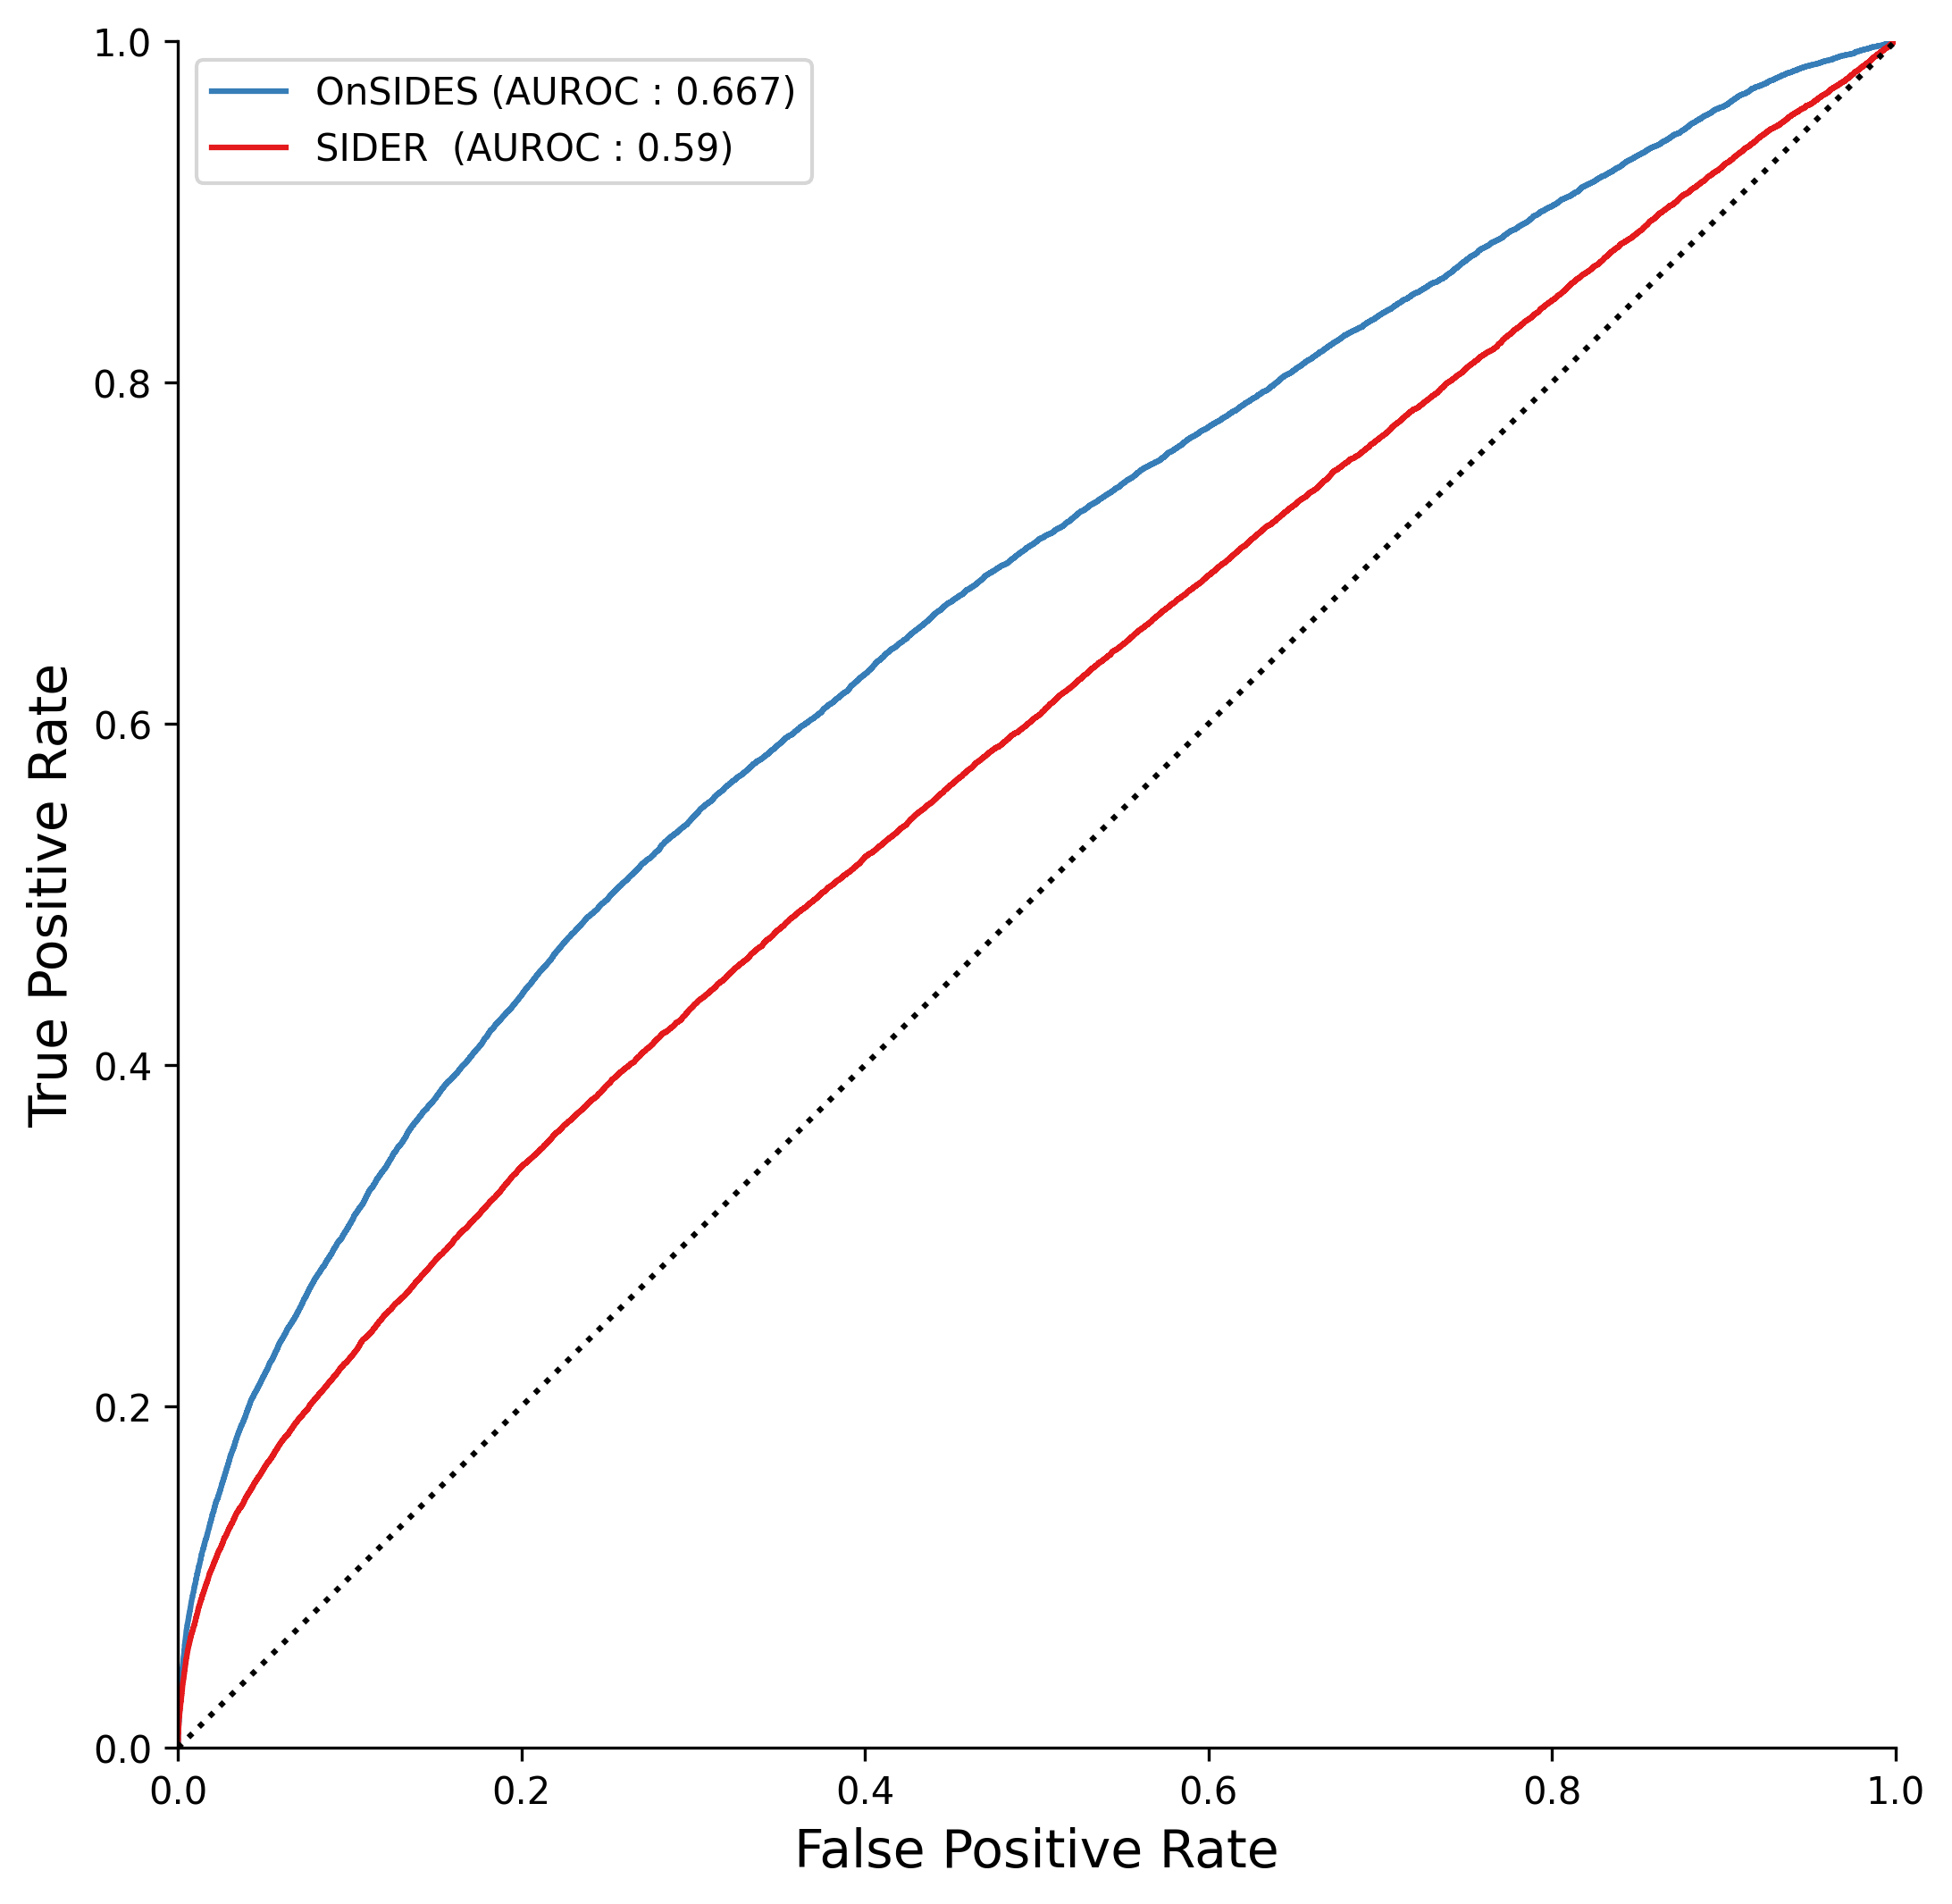

In [ ]:
#drugbank target
onsides_db = onsides_tn[onsides_tn.target_overlap.notna()]
sider_db = sider_tn[sider_tn.target_overlap.notna()]
onsides_db.loc[onsides_db["target_overlap"] != 0, "target_overlap"] = 1
sider_db.loc[sider_db["target_overlap"] != 0, "target_overlap"] = 1
onsides_auroc = round(roc_auc_score(onsides_db.target_overlap, onsides_db.z_adjust_score), 3)
sider_auroc = round(roc_auc_score(sider_db.target_overlap, sider_db.z_adjust_score), 3)
print('onsides', onsides_auroc)
print('sider', sider_auroc)
#sns.set(rc={'figure.figsize':(8.27,8.27)})
from matplotlib.pyplot import figure
figure(figsize=(8.27, 8.27), dpi=300)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
fpr, tpr, thresholds = roc_curve(onsides_db.target_overlap, onsides_db.z_adjust_score)
sns.lineplot(x=fpr, y=tpr, label = 'OnSIDES (AUROC : {})'.format(onsides_auroc), estimator=None, n_boot=0, c = '#377eb8')
fpr, tpr, thresholds = roc_curve(sider_db.target_overlap, sider_db.z_adjust_score)
sns.lineplot(x=fpr, y=tpr, label = 'SIDER  (AUROC : {})'.format(sider_auroc), estimator=None, n_boot=0, c = '#e41a1c')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(fontsize=14)
#plt.title('ROC Curve for Prediction of Shared Drug Targets')
sns.lineplot(x=[0,1], y=[0,1], linestyle = 'dotted', color = 'black')
plt.savefig(data_folder+'roc_curve_target_v0828.png')
plt.show()

onsides 0.7279911019339083
sider 0.6018332928959621


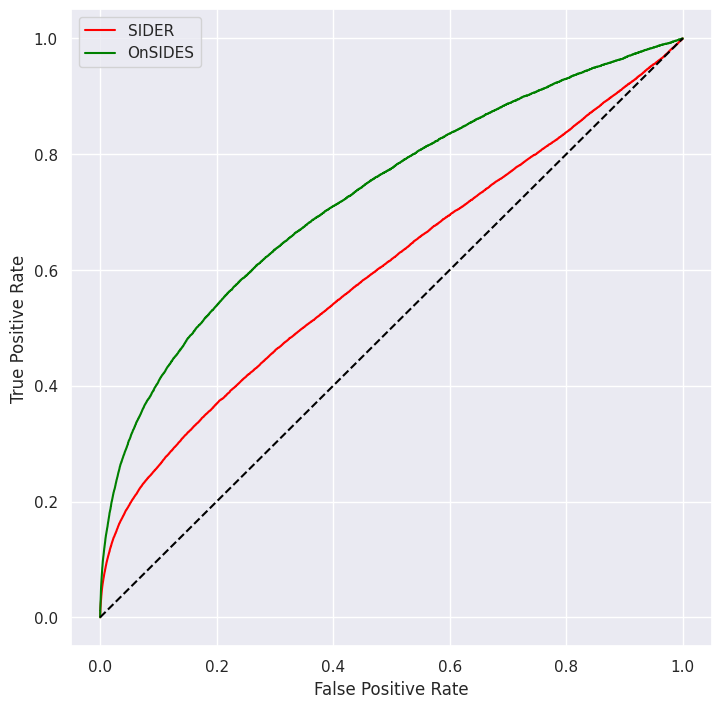

In [ ]:
#drugbank indications
onsides_db = onsides_tn[onsides_tn.db_indi_overlap.notna()]
sider_db = sider_tn[sider_tn.db_indi_overlap.notna()]
onsides_db.loc[onsides_db["db_indi_overlap"] != 0, "db_indi_overlap"] = 1
sider_db.loc[sider_db["db_indi_overlap"] != 0, "db_indi_overlap"] = 1
onsides_auroc = round(roc_auc_score(onsides_db.db_indi_overlap, onsides_db.z_adjust_score), 3)
sider_auroc = round(roc_auc_score(sider_db.db_indi_overlap, sider_db.z_adjust_score), 3)
print('onsides', onsides_auroc)
print('sider', sider_auroc)
sns.set(rc={'figure.figsize':(8.27,8.27)})
fpr, tpr, thresholds = roc_curve(sider_db.db_indi_overlap, sider_db.z_adjust_score)
sns.lineplot(x=fpr, y=tpr, label = 'SIDER', estimator=None, n_boot=0, c = 'red')
fpr, tpr, thresholds = roc_curve(onsides_db.db_indi_overlap, onsides_db.z_adjust_score)
sns.lineplot(x=fpr, y=tpr, label = 'OnSIDES (AUROC : {})'.format(onsides_auroc), estimator=None, n_boot=0, c = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
sns.lineplot(x=[0,1], y=[0,1], linestyle = '--', color = 'black')
plt.savefig(data_folder+'roc_curve_indications_v0205.png')
plt.show()

onsides 0.6161599368028374
sider 0.576260291197747


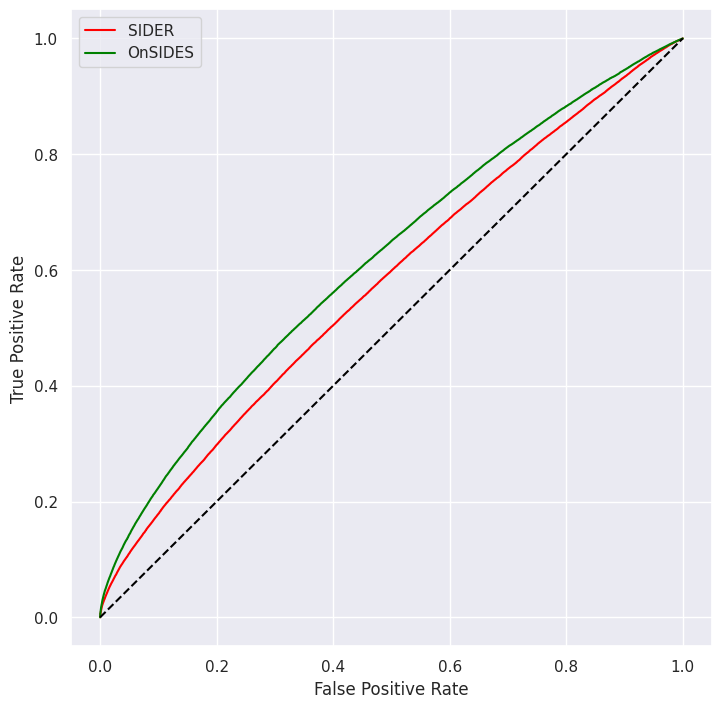

In [ ]:
#medi-hps indications
onsides_db = onsides_tn[onsides_tn.medi_indi_overlap.notna()]
sider_db = sider_tn[sider_tn.medi_indi_overlap.notna()]
onsides_db.loc[onsides_db["medi_indi_overlap"] != 0, "medi_indi_overlap"] = 1
sider_db.loc[sider_db["medi_indi_overlap"] != 0, "medi_indi_overlap"] = 1
print('onsides', roc_auc_score(onsides_db.medi_indi_overlap, onsides_db.z_adjust_score))
print('sider', roc_auc_score(sider_db.medi_indi_overlap, sider_db.z_adjust_score))
sns.set(rc={'figure.figsize':(8.27,8.27)})
fpr, tpr, thresholds = roc_curve(sider_db.medi_indi_overlap, sider_db.z_adjust_score)
sns.lineplot(x=fpr, y=tpr, label = 'SIDER', estimator=None, n_boot=0, c = 'red')
fpr, tpr, thresholds = roc_curve(onsides_db.medi_indi_overlap, onsides_db.z_adjust_score)
sns.lineplot(x=fpr, y=tpr, label = 'OnSIDES', estimator=None, n_boot=0, c = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
sns.lineplot(x=[0,1], y=[0,1], linestyle = '--', color = 'black')
plt.savefig(data_folder+'roc_curve_medi_hps_indications_v0205.png')
plt.show()

In [ ]:
def check_and(overlap_1, overlap_2):
  if overlap_1 == 1 and overlap_2 == 1: check_and = 1
  elif str(overlap_1) == 'nan' and str(overlap_2) == 'nan': check_and = None
  else: check_and = 0
  return check_and
def check_or(overlap_1, overlap_2):
  if str(overlap_1) == 'nan' and str(overlap_2) == 'nan': check_or = None
  elif overlap_1 == 1 or overlap_2 == 1: check_or = 1
  else: check_or = 0
  return check_or
onsides_tn['medi_hps_and_drugbank'] = onsides_tn.apply(lambda x: check_and(x.db_indi_overlap,x.medi_indi_overlap), axis = 1)
onsides_tn['medi_hps_or_drugbank'] = onsides_tn.apply(lambda x: check_or(x.db_indi_overlap,x.medi_indi_overlap), axis = 1)
sider_tn['medi_hps_and_drugbank'] = sider_tn.apply(lambda x: check_and(x.db_indi_overlap,x.medi_indi_overlap), axis = 1)
sider_tn['medi_hps_or_drugbank'] = sider_tn.apply(lambda x: check_or(x.db_indi_overlap,x.medi_indi_overlap), axis = 1)
onsides_and = onsides_tn[onsides_tn.medi_hps_and_drugbank.notna()]
onsides_or = onsides_tn[onsides_tn.medi_hps_or_drugbank.notna()]
print('onsides - drugbank and', roc_auc_score(onsides_and.medi_hps_and_drugbank, onsides_and.z_adjust_score))
print('onsides - drugbank or ', roc_auc_score(onsides_or.medi_hps_or_drugbank, onsides_or.z_adjust_score))
sider_and = sider_tn[sider_tn.medi_hps_and_drugbank.notna()]
sider_or = sider_tn[sider_tn.medi_hps_or_drugbank.notna()]
print('sider - drugbank and', roc_auc_score(sider_and.medi_hps_and_drugbank, sider_and.z_adjust_score))
print('sider - drugbank or ', roc_auc_score(sider_or.medi_hps_or_drugbank, sider_or.z_adjust_score))

onsides - drugbank and 0.7208800128318373
onsides - drugbank or  0.6192747444602323
sider - drugbank and 0.6515035429476314
sider - drugbank or  0.5744150982248226


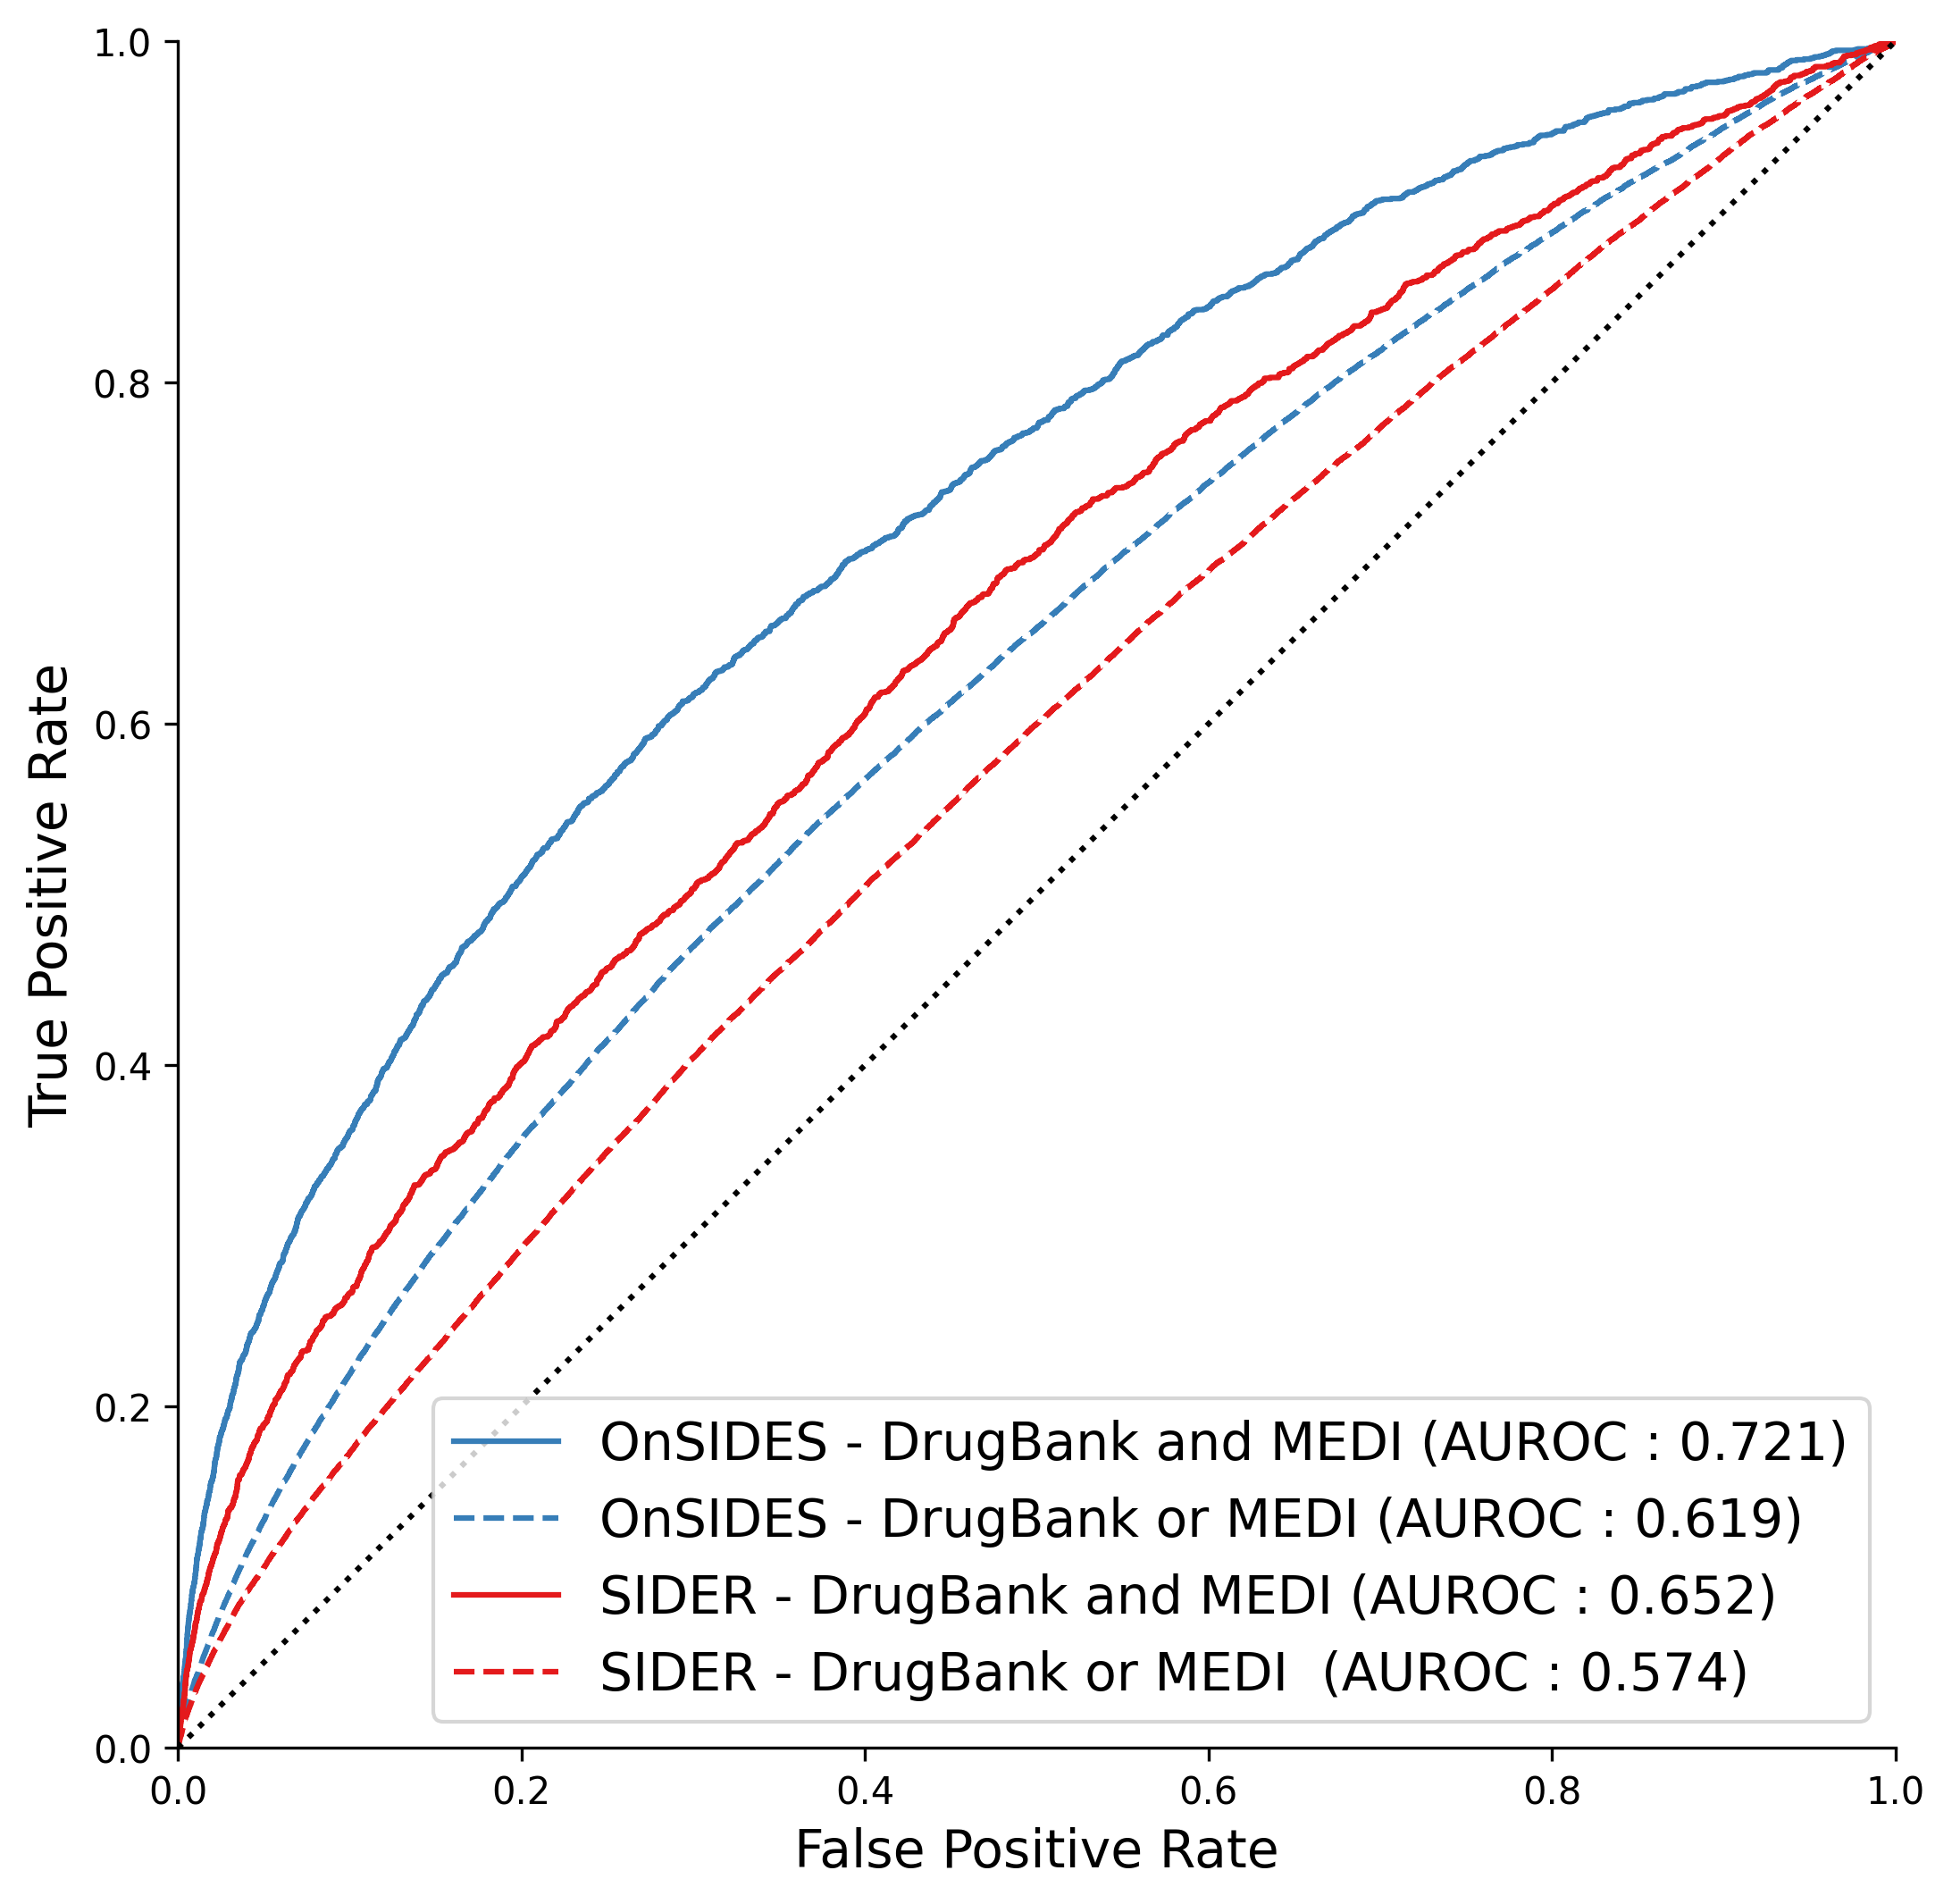

In [ ]:
#sns.set(rc={'figure.figsize':(8.27,8.27)})
from matplotlib.pyplot import figure
figure(figsize=(8.27, 8.27), dpi=300)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
onsides_or_auroc = round(roc_auc_score(onsides_or.medi_hps_or_drugbank, onsides_or.z_adjust_score), 3)
onsides_and_auroc = round(roc_auc_score(onsides_and.medi_hps_and_drugbank, onsides_and.z_adjust_score), 3)
sider_and_auroc = round(roc_auc_score(sider_and.medi_hps_and_drugbank, sider_and.z_adjust_score), 3)
sider_or_auroc = round(roc_auc_score(sider_or.medi_hps_or_drugbank, sider_or.z_adjust_score), 3)

fpr, tpr, thresholds = roc_curve(onsides_and.medi_hps_and_drugbank, onsides_and.z_adjust_score)
plt.plot(fpr, tpr, label = 'OnSIDES - DrugBank and MEDI (AUROC : {})'.format(onsides_and_auroc), c = '#377eb8')
fpr, tpr, thresholds = roc_curve(onsides_or.medi_hps_or_drugbank, onsides_or.z_adjust_score)
plt.plot(fpr, tpr, label = 'OnSIDES - DrugBank or MEDI (AUROC : {})'.format(onsides_or_auroc),  c = '#377eb8', linestyle = '--')
fpr, tpr, thresholds = roc_curve(sider_and.medi_hps_and_drugbank, sider_and.z_adjust_score)
plt.plot(fpr, tpr, label = 'SIDER - DrugBank and MEDI (AUROC : {})'.format(sider_and_auroc), c='#e41a1c')
fpr, tpr, thresholds = roc_curve(sider_or.medi_hps_or_drugbank, sider_or.z_adjust_score)
plt.plot(fpr, tpr, label = 'SIDER - DrugBank or MEDI  (AUROC : {})'.format(sider_or_auroc), c='#e41a1c', linestyle = '--')
plt.plot([0,1], [0,1], linestyle = 'dotted', color = 'black')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=14)
plt.savefig(data_folder+'roc_curve_indications_medi_db_v0828.png')
plt.show()

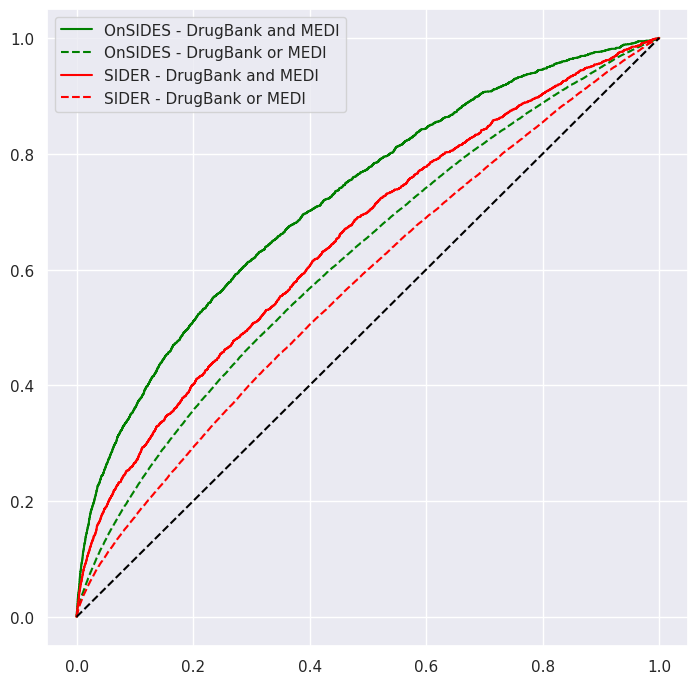

In [ ]:
#sns.set(rc={'figure.figsize':(8.27,8.27)})
from matplotlib.pyplot import figure
figure(figsize=(8.27, 8.27), dpi=300)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
onsides_and =
fpr, tpr, thresholds = roc_curve(onsides_and.medi_hps_and_drugbank, onsides_and.z_adjust_score)
sns.lineplot(x=fpr, y=tpr, label = 'OnSIDES - DrugBank and MEDI', estimator=None, n_boot=0, c = 'green')
fpr, tpr, thresholds = roc_curve(onsides_or.medi_hps_or_drugbank, onsides_or.z_adjust_score)
sns.lineplot(x=fpr, y=tpr, label = 'OnSIDES - DrugBank or MEDI', estimator=None, n_boot=0,  c = 'green', linestyle = '--')
fpr, tpr, thresholds = roc_curve(sider_and.medi_hps_and_drugbank, sider_and.z_adjust_score)
sns.lineplot(x=fpr, y=tpr, label = 'SIDER - DrugBank and MEDI', estimator=None, n_boot=0, c='red')
fpr, tpr, thresholds = roc_curve(sider_or.medi_hps_or_drugbank, sider_or.z_adjust_score)
sns.lineplot(x=fpr, y=tpr, label = 'SIDER - DrugBank or MEDI', estimator=None, n_boot=0, c='red', linestyle = '--')
sns.lineplot(x=[0,1], y=[0,1], linestyle = '--', color = 'black')
plt.savefig(data_folder+'roc_curve_indications_medi_db_v0205.png')
plt.show()